Elaborar un modelo predictivo de regresión lineal simple utilizando técnicas  de  validación  cruzada  y  el  lenguaje  Python  para  resolver  un problema.
Suponga que le han pedido averiguar si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:

1. Obtenga la distribución de los datos

In [16]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear DataFrame
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.","Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago","Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa","Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

# Análisis exploratorio de datos
print(datos.describe())



            bateos        runs
count    30.000000   30.000000
mean   5523.500000  693.600000
std      79.873067   82.479088
min    5417.000000  556.000000
25%    5448.250000  629.000000
50%    5515.500000  705.500000
75%    5575.000000  734.000000
max    5710.000000  875.000000


2. Calcule la correlación de Pearson. Interprete su valor.

In [17]:
# Correlación de Pearson
correlacion = datos['bateos'].corr(datos['runs'])
print(f'Correlación de Pearson: {correlacion}')



Correlación de Pearson: 0.6106270467206688


3. Separe sus datos de entrenamiento en 80/20.

In [18]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(datos['bateos'].values.reshape(-1,1), datos['runs'].values.reshape(-1,1), test_size=0.2, random_state=42)

# Convertir las matrices en DataFrames y combinarlas
train_df = pd.DataFrame({'bateos': X_train.flatten(), 'runs': y_train.flatten()})
test_df = pd.DataFrame({'bateos': X_test.flatten(), 'runs': y_test.flatten()})

# Mostrar las primeras filas de cada DataFrame
print("Datos de entrenamiento:\n", train_df.head())
print("\nDatos de prueba:\n", test_df.head())

Datos de entrenamiento:
    bateos  runs
0    5417   593
1    5436   707
2    5549   654
3    5659   855
4    5532   762

Datos de prueba:
    bateos  runs
0    5486   570
1    5579   713
2    5452   645
3    5509   704
4    5544   735


4. Ajuste un modelo de regresión lineal.

In [19]:
# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

5. Escriba  la  recta  de  regresión  que  obtuvo  con  sus  estimaciones respectivas.

In [20]:
# Ecuación de la línea de regresión
print(f'Recta de regresión: y = {modelo.coef_[0][0]}*x + {modelo.intercept_[0]}')



Recta de regresión: y = 0.6668508650552262*x + -2981.517212576021


6. Obtenga el error del modelo

In [21]:
# Error del modelo
y_pred = modelo.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f'Error del modelo: {error}')



Error del modelo: 5219.975632116472


7. Obtenga la gráfica de los datos y su recta de regresión

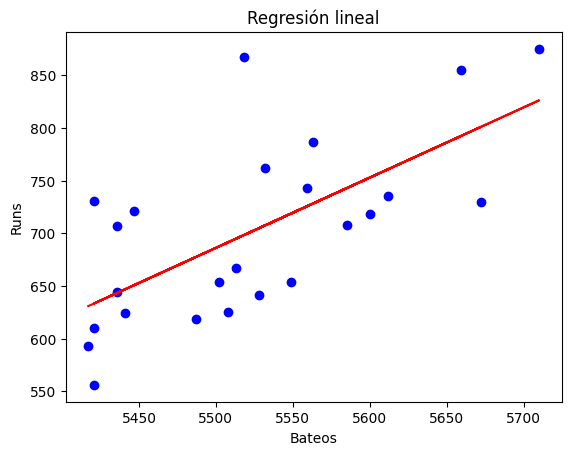

In [22]:
# Gráfica de los datos y la recta de regresión
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, modelo.predict(X_train), color='red')
plt.title('Regresión lineal')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.show()



8. Obtenga las métricas: MAE, MSE, RMSE.

In [23]:
# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Formatear la salida
print('Métricas:\n'
      ' - Error absoluto medio (MAE): {:.2f}\n'
      ' - Error cuadrático medio (MSE): {:.2f}\n'
      ' - Raíz del error cuadrático medio (RMSE): {:.2f}'.format(mae, mse, rmse))

Métricas:
 - Error absoluto medio (MAE): 51.61
 - Error cuadrático medio (MSE): 5219.98
 - Raíz del error cuadrático medio (RMSE): 72.25


Basándonos en el código proporcionado, se realizó un análisis de regresión lineal para entender la relación entre 'bateos' y 'runs' en diferentes equipos de béisbol. 

Primero, se realizó un análisis exploratorio de los datos y se calculó la correlación de Pearson, que mide la relación lineal entre dos variables. Un valor cercano a 1 indica una fuerte correlación positiva, mientras que un valor cercano a -1 indica una fuerte correlación negativa. Un valor cercano a 0 indica que no hay correlación.

Luego, se dividió el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba, con el 80% de los datos utilizados para el entrenamiento y el 20% restante para la prueba. Se ajustó un modelo de regresión lineal a los datos de entrenamiento y se obtuvo la ecuación de la línea de regresión.

Se calculó el error del modelo utilizando el error cuadrático medio (MSE), que mide la cantidad promedio de error en las predicciones del modelo. También se calculó el error absoluto medio (MAE), que mide la cantidad promedio de error absoluto en las predicciones del modelo, y la raíz del error cuadrático medio (RMSE), que es la raíz cuadrada del MSE y proporciona una medida de error que está en las mismas unidades que la variable de respuesta.

Finalmente, se trazaron los datos y la línea de regresión para visualizar la relación entre 'bateos' y 'runs'. 

La problemática planteada al principio parece ser entender cómo la cantidad de 'bateos' en un equipo de béisbol se relaciona con la cantidad de 'runs' que el equipo obtiene. Este análisis proporciona una visión de esta relación y puede ser útil para los equipos que buscan mejorar su rendimiento.